# 규제가 있는 선형회귀 - 릿지, 라쏘, 엘라스틱넷 회귀

#### 규제가 있는 모델 구축 - 당뇨병 데이터세트
#### 1. 데이터 전처리
        - 스케일링
#### 2. Ridge, Lasso, Elasticnet regression 구축: 회귀 계수 확인, 하이퍼 파라미터 탐색
        - 하이퍼 파라미터(alpha): 규제에 가장 영향을 끼치는 것
#### 3. 교차 검증으로 최적의 하이퍼파라미터 탐색: LassoCV()

In [101]:
# 관련 라이브러리 및 모듈 Import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [102]:
# warning message 없애기
import warnings
warnings.filterwarnings(action='ignore')

# 0. 데이터 수집, 탐색, 준비

In [103]:
from sklearn.datasets import load_diabetes

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [104]:
# 반복하여 사용할 함수 생성
def evaluate_score(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f'mse- {mse:.3f}')
    print(f'rmse- {rmse:.3f}')
    print(f'r2- {r2:.3f}')

    return

####  데이터셋에 대한 설명 및 정보 확인

In [105]:
# 데이터셋 정보확인

diab = load_diabetes()

diab.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [106]:
diab.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

#### 데이터프레임 변환

In [107]:
# 독립변수(피처)와 종속변수를 DataFrame자료형으로 변환

In [108]:
# 데이터셋 객체의 data 배열, 즉, 독립변수 X가되는 피처(특성)들을 DataFrame자료형으로 변환하여
# diab_df생성
# diab_df.head() 데이터 5개 확인

diab_df = pd.DataFrame(data=diab.data, columns=diab.feature_names)
diab_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [109]:
# 누락치 확인,  data type 확인 ->  isnull().sum(), target에 결측값이 있으면 해당 관측치 제거
diab_df.isnull().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

In [110]:
diab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [111]:
# X(독립변수), Y(종속변수) 분할
X = diab.data
y = diab.target

In [112]:
# 학습용, 평가용 데이터 분리
# test_size = 0.3, random_state = 42

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

# 모델별 계수변화, 알파별 계수 비교 데이터프레임(comp_df)

In [113]:
#각 모델별 계수로 이루어진 데이터프레임 준비
comp_df = pd.DataFrame(index=diab.feature_names + ['R2 scores'])
comp_df


""
age
sex
bmi
bp
s1
s2
s3
s4
s5
s6


In [114]:
#각 모델별, 규제강도별 평가지표 저장


# 1. 규제가 없는 선형모델

In [115]:
#모델 구축 및 학습
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

#모델 평가
y_pred = model_LR.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2: ', r2)


# 회귀 계수 확인
LR_coef = pd.Series(model_LR.coef_, index=diab.feature_names).sort_values(ascending=False)
print(LR_coef)

# r2
print(r2)

r2:  0.4772897164322617
s5     659.268951
bmi    546.299723
s2     506.763241
bp     388.398341
s4     288.035267
s3     121.154351
s6      41.376701
age     29.254013
sex   -261.706469
s1    -901.959668
dtype: float64
0.4772897164322617


- 계수값 시각화

s1     901.959668
s5     659.268951
bmi    546.299723
s2     506.763241
bp     388.398341
s4     288.035267
sex    261.706469
s3     121.154351
s6      41.376701
age     29.254013
dtype: float64


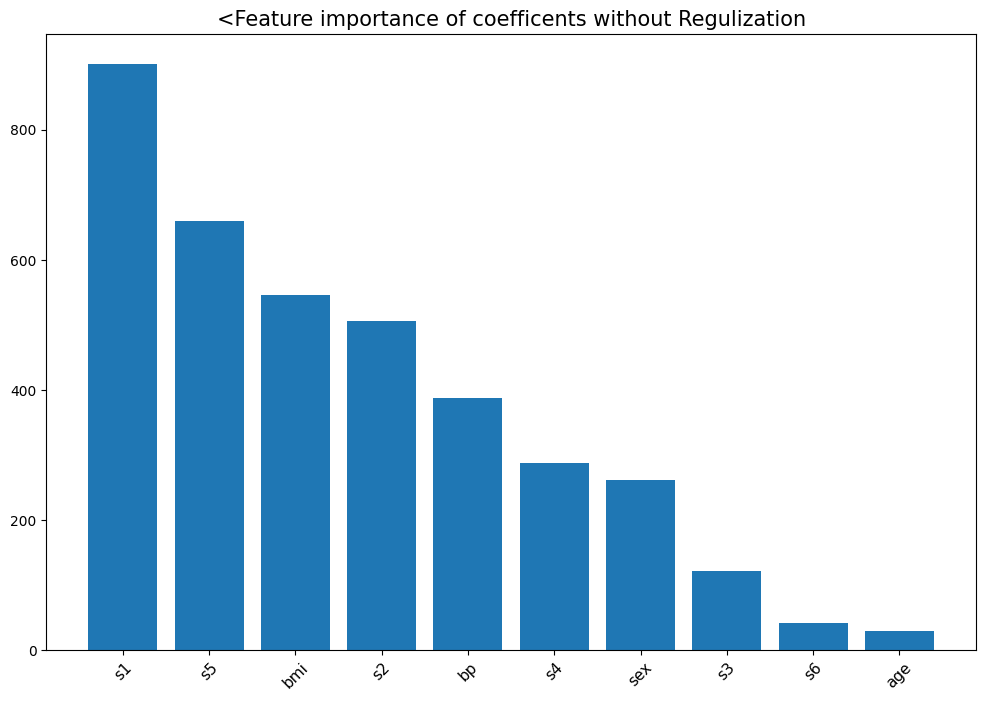

In [116]:
coef = LR_coef.sort_values(ascending=False)
coef = np.abs(LR_coef).sort_values(ascending=False)
print(coef)

# 시각화
plt.figure(figsize=(12,8))
plt.title('<Feature importance of coefficents without Regulization',\
          fontsize=15)
plt.bar(coef.index, coef.values)
plt.xticks(coef.index, rotation=45, fontsize=11);


In [117]:
comp_df['LR'] = np.append(model_LR.coef_, r2)
comp_df

,LR
age,29.254013
sex,-261.706469
bmi,546.299723
bp,388.398341
s1,-901.959668
s2,506.763241
s3,121.154351
s4,288.035267
s5,659.268951
s6,41.376701


In [118]:
# 모델별 비교 데이터프레임 열 추가


# 1. 릿지 모델

In [119]:
# 모델 구축 및 학습
model_Ridge = Ridge()
model_Ridge.fit(X_train, y_train)

Ridge()

In [120]:
# 릿지 선형회귀 모델 평가: model_Ridge1, alpha=1
y_pred = model_Ridge.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

# a=1일때 회귀 계수 확인
Ridge_coef = pd.Series(model_Ridge.coef_, index= diab.feature_names)
Ridge_coef

0.4233440269603015


age     45.054210
sex    -71.947397
bmi    280.716252
bp     195.212662
s1      -2.229303
s2     -17.540797
s3    -148.688862
s4     120.467240
s5     198.614401
s6     106.934692
dtype: float64

In [121]:
# 선형 모델 평가


#a = 1 릿지 모델 회귀 계수


- 계수값 시각화

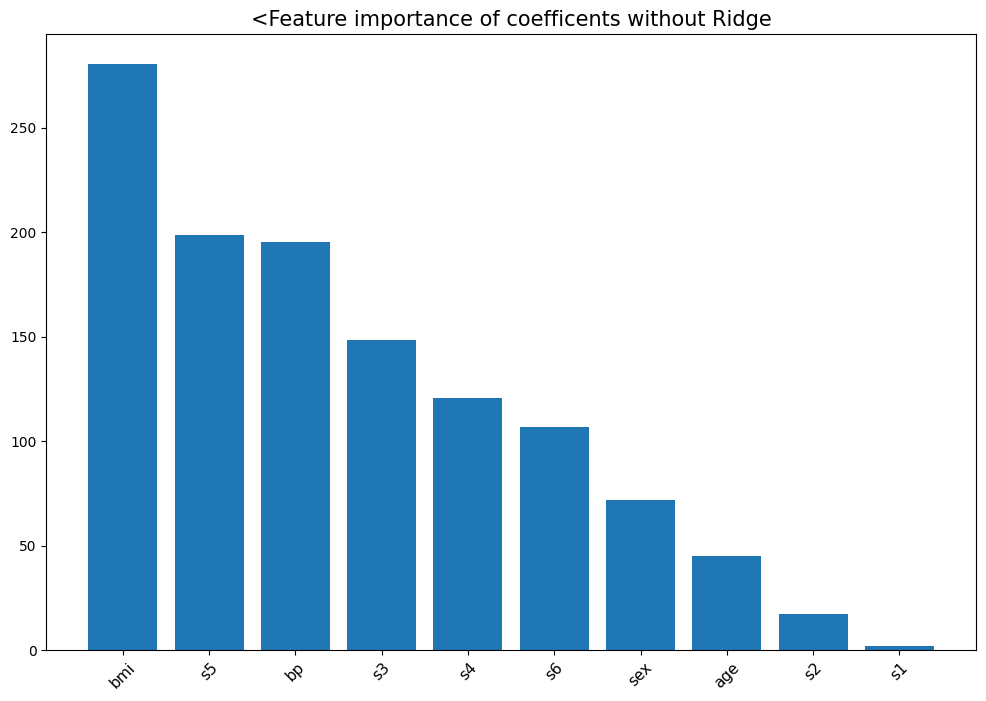

In [122]:
# 규제를 하여 회귀계수가 감소했다는 것을 알수있음
coef = pd.Series(np.abs(Ridge_coef), \
                 index=diab.feature_names).sort_values(ascending=False)
coef

# 시각화
plt.figure(figsize=(12,8))
plt.title('<Feature importance of coefficents without Ridge',\
          fontsize=15)
plt.bar(coef.index, coef.values)
plt.xticks(coef.index, rotation=45, fontsize=11);

In [123]:
# alpha_list=[0.01, 1, 10, 100]인 경우
alpha_list = [0.01, 1, 10, 100]

for alpha in alpha_list:
    model_Ridge = Ridge(alpha=alpha)
    model_Ridge.fit(X_train, y_train)

    y_pred = model_Ridge.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    col_name = f'Ridge(alpha={alpha:.2f})'
    
    comp_df[col_name] = np.append(model_Ridge.coef_, r2)


In [124]:
comp_df

,LR,Ridge(alpha=0.01),Ridge(alpha=1.00),Ridge(alpha=10.00),Ridge(alpha=100.00)
age,29.254013,34.167328,45.054210,16.230889,2.072848
sex,-261.706469,-254.043316,-71.947397,-2.961367,-0.003808
bmi,546.299723,550.844882,280.716252,59.524160,6.899915
bp,388.398341,379.126708,195.212662,43.421300,5.085100
s1,-901.959668,-404.253263,-2.229303,13.875073,2.069660
s2,506.763241,123.029219,-17.540797,10.865267,1.743748
s3,121.154351,-99.041674,-148.688862,-37.495847,-4.508876
s4,288.035267,215.032624,120.467240,38.728538,4.902421
s5,659.268951,463.842634,198.614401,49.224746,5.926496
s6,41.376701,50.351490,106.934692,34.737987,4.328698


# 2. 라쏘 모델

In [125]:
# 모델 구축 및 학습(alpha=1)
model_Lasso = Lasso()
model_Lasso.fit(X_train, y_train)

Lasso()

In [126]:
#모델 평가
y_pred = model_Lasso.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2: ', r2)

r2:  0.36189802861957876


In [127]:
# 회귀 계수 확인(alpha=1)
# 0인 특성은 종속변수에 영향력이 덜 미치는 특성임(=종속변수와 각 독립변수와의 상관관계)
Lasso_coef = pd.Series(model_Lasso.coef_, index=diab.feature_names).sort_values(ascending=False)
print(Lasso_coef)

bmi    443.703388
s5     201.966478
bp      51.601094
age      0.000000
sex     -0.000000
s1       0.000000
s2       0.000000
s3      -0.000000
s4       0.000000
s6       0.000000
dtype: float64


In [128]:
# 라쏘 선형회귀 모델 평가(alpha=1)
# 선형 모델 평가


#a = 1 라쏘 모델 회귀 계수



- 계수 시각화

bmi    443.703388
s5     201.966478
bp      51.601094
age      0.000000
sex      0.000000
s1       0.000000
s2       0.000000
s3       0.000000
s4       0.000000
s6       0.000000
dtype: float64


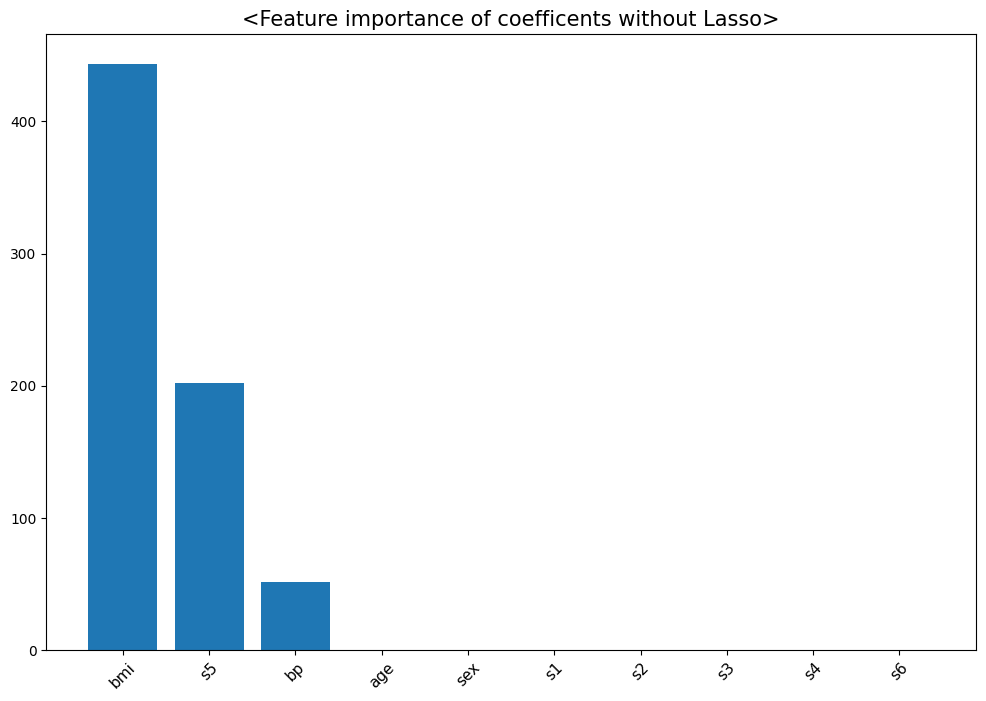

In [129]:
coef = np.abs(Lasso_coef)
coef = pd.Series(coef, index=diab.feature_names).sort_values(ascending=False)
print(coef)

# 시각화
plt.figure(figsize=(12,8))
plt.title('<Feature importance of coefficents without Lasso>',\
          fontsize=15)
plt.bar(coef.index, coef.values)
plt.xticks(coef.index, rotation=45, fontsize=11);

In [130]:
# alpha_list=[0.01, 1, 10, 100]인 경우
alpha_list = [0.01, 1, 10, 100]

for alpha in alpha_list:
    model_Lasso = Lasso(alpha=alpha)
    model_Lasso.fit(X_train, y_train)

    y_pred = model_Lasso.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    col_name = f'Lasso(alpha={alpha:.2f})'
    
    comp_df[col_name] = np.append(model_Lasso.coef_, r2)

In [131]:

comp_df

,LR,Ridge(alpha=0.01),Ridge(alpha=1.00),Ridge(alpha=10.00),Ridge(alpha=100.00),Lasso(alpha=0.01),Lasso(alpha=1.00),Lasso(alpha=10.00),Lasso(alpha=100.00)
age,29.254013,34.167328,45.054210,16.230889,2.072848,28.246364,0.000000,0.000000,0.000000
sex,-261.706469,-254.043316,-71.947397,-2.961367,-0.003808,-250.819184,-0.000000,0.000000,0.000000
bmi,546.299723,550.844882,280.716252,59.524160,6.899915,556.215874,443.703388,0.000000,0.000000
bp,388.398341,379.126708,195.212662,43.421300,5.085100,380.659502,51.601094,0.000000,0.000000
s1,-901.959668,-404.253263,-2.229303,13.875073,2.069660,-468.739540,0.000000,0.000000,0.000000
s2,506.763241,123.029219,-17.540797,10.865267,1.743748,166.993417,0.000000,0.000000,0.000000
s3,121.154351,-99.041674,-148.688862,-37.495847,-4.508876,-60.219459,-0.000000,-0.000000,-0.000000
s4,288.035267,215.032624,120.467240,38.728538,4.902421,230.916253,0.000000,0.000000,0.000000
s5,659.268951,463.842634,198.614401,49.224746,5.926496,492.634358,201.966478,0.000000,0.000000
s6,41.376701,50.351490,106.934692,34.737987,4.328698,43.969346,0.000000,0.000000,0.000000


# 3. 엘라스틱넷 모델

In [132]:
# 모델 구축 및 학습(alpha=1, l1_ratio=0.5)
model_ElasticNet = ElasticNet(alpha=0.1, l1_ratio=0.5)
model_ElasticNet.fit(X_train, y_train)

ElasticNet(alpha=0.1)

In [133]:
# 릿지 선형회귀 모델 평가(model_Ridge1, alpha=1)
# 선형 모델 평가
y_pred = model_ElasticNet.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

# a=1일때 회귀 계수 확인
ElasticNet_coef = pd.Series(model_ElasticNet.coef_, index= diab.feature_names)
ElasticNet_coef

0.10409724421868916


age    10.591712
sex    -0.285015
bmi    39.807218
bp     28.892278
s1      9.604595
s2      7.589472
s3    -25.067309
s4     26.506264
s5     33.260185
s6     23.526244
dtype: float64

- 계수 시각화

bmi    39.807218
s5     33.260185
bp     28.892278
s4     26.506264
s3     25.067309
s6     23.526244
age    10.591712
s1      9.604595
s2      7.589472
sex     0.285015
dtype: float64


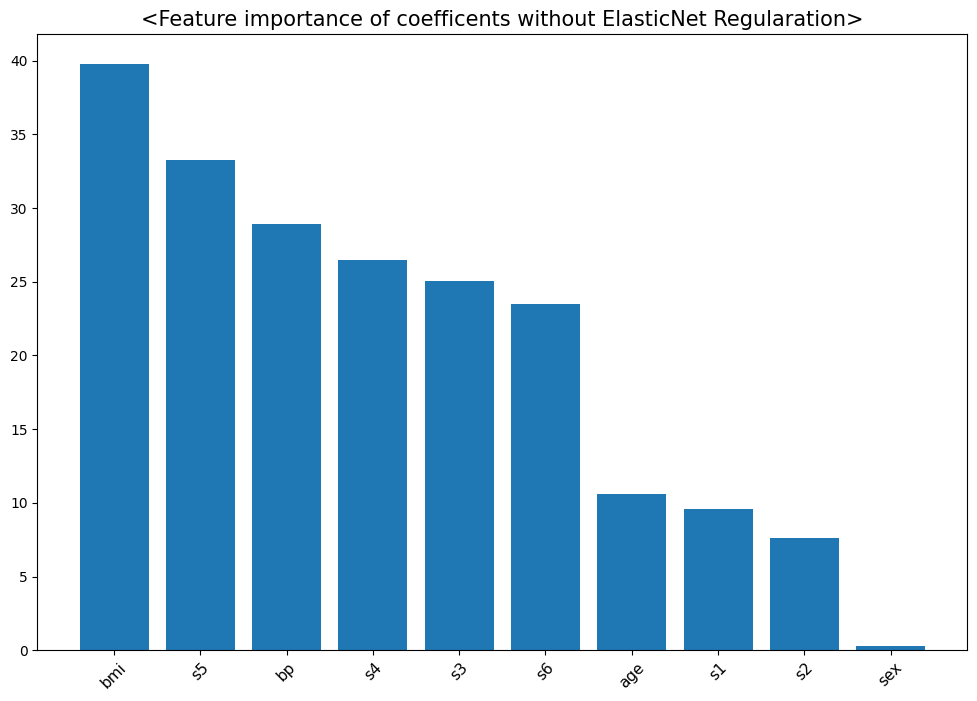

In [134]:
coef = np.abs(ElasticNet_coef)
coef = pd.Series(coef, index=diab.feature_names).sort_values(ascending=False)
print(coef)

# 시각화
plt.figure(figsize=(12,8))
plt.title('<Feature importance of coefficents without ElasticNet Regularation>',\
          fontsize=15)
plt.bar(coef.index, coef.values)
plt.xticks(coef.index, rotation=45, fontsize=11);


In [135]:
# alpha_list=[0.01, 1, 10, 100]인 경우, l1_ratio=0.5 
alpha_list = [0.01, 1, 10, 100]

for alpha in alpha_list:
    model_ElasticNet = ElasticNet(alpha=alpha)
    model_ElasticNet.fit(X_train, y_train)

    y_pred = model_ElasticNet.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    col_name = f'ElasticNet(alpha={alpha:.2f})'
    
    comp_df[col_name] = np.append(model_ElasticNet.coef_, r2)


In [136]:
comp_df

,LR,Ridge(alpha=0.01),Ridge(alpha=1.00),Ridge(alpha=10.00),Ridge(alpha=100.00),Lasso(alpha=0.01),Lasso(alpha=1.00),Lasso(alpha=10.00),Lasso(alpha=100.00),ElasticNet(alpha=0.01),ElasticNet(alpha=1.00),ElasticNet(alpha=10.00),ElasticNet(alpha=100.00)
age,29.254013,34.167328,45.054210,16.230889,2.072848,28.246364,0.000000,0.000000,0.000000,41.417999,0.367567,0.000000,0.000000
sex,-261.706469,-254.043316,-71.947397,-2.961367,-0.003808,-250.819184,-0.000000,0.000000,0.000000,-45.935016,0.000000,0.000000,0.000000
bmi,546.299723,550.844882,280.716252,59.524160,6.899915,556.215874,443.703388,0.000000,0.000000,225.053463,3.512046,0.000000,0.000000
bp,388.398341,379.126708,195.212662,43.421300,5.085100,380.659502,51.601094,0.000000,0.000000,158.163233,2.328646,0.000000,0.000000
s1,-901.959668,-404.253263,-2.229303,13.875073,2.069660,-468.739540,0.000000,0.000000,0.000000,9.021067,0.380194,0.000000,0.000000
s2,506.763241,123.029219,-17.540797,10.865267,1.743748,166.993417,0.000000,0.000000,0.000000,-1.762029,0.168337,0.000000,0.000000
s3,121.154351,-99.041674,-148.688862,-37.495847,-4.508876,-60.219459,-0.000000,-0.000000,-0.000000,-124.240022,-1.955958,-0.000000,-0.000000
s4,288.035267,215.032624,120.467240,38.728538,4.902421,230.916253,0.000000,0.000000,0.000000,106.910117,2.228128,0.000000,0.000000
s5,659.268951,463.842634,198.614401,49.224746,5.926496,492.634358,201.966478,0.000000,0.000000,165.006085,2.887428,0.000000,0.000000
s6,41.376701,50.351490,106.934692,34.737987,4.328698,43.969346,0.000000,0.000000,0.000000,97.213477,1.846225,0.000000,0.000000


In [137]:
comp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, age to R2 scores
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   LR                        11 non-null     float64
 1   Ridge(alpha=0.01)         11 non-null     float64
 2   Ridge(alpha=1.00)         11 non-null     float64
 3   Ridge(alpha=10.00)        11 non-null     float64
 4   Ridge(alpha=100.00)       11 non-null     float64
 5   Lasso(alpha=0.01)         11 non-null     float64
 6   Lasso(alpha=1.00)         11 non-null     float64
 7   Lasso(alpha=10.00)        11 non-null     float64
 8   Lasso(alpha=100.00)       11 non-null     float64
 9   ElasticNet(alpha=0.01)    11 non-null     float64
 10  ElasticNet(alpha=1.00)    11 non-null     float64
 11  ElasticNet(alpha=10.00)   11 non-null     float64
 12  ElasticNet(alpha=100.00)  11 non-null     float64
dtypes: float64(13)
memory usage: 1.2+ KB


### LassoCV() : k-폴드 교차 검증으로 최적의 Lasso 모델 하이퍼파라미터 alpha 찾기

In [138]:
#LassoCV()에 필요한 매개변수 설정
#0.01 ~ 9.91 까지 alpha_list  생성

cv = 5
alpha_list = np.arange(0.01, 10, 0.01)
max_iter = 1000

In [139]:
from sklearn.linear_model import LassoCV

model_LassoCV = LassoCV(alphas=alpha_list, cv=5, max_iter=1000, n_jobs=-1, \
        random_state=42)

- 모델 학습

In [140]:
model_LassoCV.fit(X_train, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67...
       9.25, 9.26, 9.27, 9.28, 9.29, 9.3 , 9.31, 9.32, 9.33, 9.34, 9.35,
       9.36, 9.37, 9.38, 9.39, 9.4 , 9.41, 9.42, 9.43, 9.44, 9.45, 9.46,
       9.47, 9.48, 9.49, 9.5 , 9.51, 9.52, 9.53, 9.54, 9.55, 9.56, 9.57,
       9.58, 9.59, 9.6 , 9.61, 9.62, 9.63, 9.64, 9.65, 9.66, 9.67, 9.68,
       9.69, 9.7 , 9.71, 9.72, 9.73, 9.74, 9.75, 9.76, 9.77, 9.78, 9.79,
       9.8 , 9.81, 9.82, 9.83, 9.84, 9.85, 9.86, 9.87, 9.88, 9.89, 9.9 ,
       9.91, 9.92, 9.93, 9.94, 9.95, 9.96, 9.97, 9.98, 9.99]),
        cv=5, n_jobs=-1, random_state=42)

In [141]:
# alpha=0.01일때, 가장 좋은 score를 얻었다.
model_LassoCV.alpha_

0.01

In [142]:
# 최적의 alpha를 가진 best_model로 다시 모델평가
best_model = Lasso(alpha=0.01)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

In [143]:
# 하지만 LassoCV로 인해 최적의 alpha는 찾았기 때문에 새로운 모델을 작성할 필요가 없음
y_pred = model_LassoCV.predict(X_test)
r2_score(y_test, y_pred)

0.47871428812904415

## GridSearchCV

In [144]:
from sklearn.model_selection import GridSearchCV

model = ElasticNet()
param_grid = {
    'alpha' : [0.01, 1, 10, 100],
    'l1_ratio': [0.1, 0.3, 0.6, 0.9],
}

grid = GridSearchCV(model, param_grid=param_grid, cv=3)

In [145]:
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [0.01, 1, 10, 100],
                         'l1_ratio': [0.1, 0.3, 0.6, 0.9]})

In [148]:
# grid가 best_model이 됨
y_pred = grid.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

0.47378958651114567


In [158]:
pd.DataFrame(grid.cv_results_)#.info()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000798,0.000655,0.000280,0.000230,0.01,0.1,"{'alpha': 0.01, 'l1_ratio': 0.1}",0.263839,0.345717,0.220628,0.276728,0.051874,4
1,0.000282,0.000040,0.000119,0.000013,0.01,0.3,"{'alpha': 0.01, 'l1_ratio': 0.3}",0.295161,0.383803,0.247244,0.308736,0.056570,3
2,0.000233,0.000019,0.000099,0.000003,0.01,0.6,"{'alpha': 0.01, 'l1_ratio': 0.6}",0.357773,0.458940,0.297350,0.371355,0.066664,2
3,0.000285,0.000079,0.000120,0.000038,0.01,0.9,"{'alpha': 0.01, 'l1_ratio': 0.9}",0.448660,0.559716,0.354858,0.454411,0.083732,1
4,0.000462,0.000296,0.000109,0.000008,1,0.1,"{'alpha': 1, 'l1_ratio': 0.1}",-0.036596,0.006173,-0.054330,-0.028251,0.025395,8
5,0.000362,0.000084,0.000119,0.000010,1,0.3,"{'alpha': 1, 'l1_ratio': 0.3}",-0.035813,0.006724,-0.053471,-0.027520,0.025265,7
6,0.000259,0.000065,0.000214,0.000167,1,0.6,"{'alpha': 1, 'l1_ratio': 0.6}",-0.033089,0.008825,-0.050609,-0.024958,0.024936,6
7,0.000239,0.000025,0.000102,0.000005,1,0.9,"{'alpha': 1, 'l1_ratio': 0.9}",-0.014408,0.024254,-0.031096,-0.007083,0.023182,5
8,0.000350,0.000091,0.000132,0.000021,10,0.1,"{'alpha': 10, 'l1_ratio': 0.1}",-0.043113,-0.000548,-0.060565,-0.034742,0.025207,9
9,0.000350,0.000189,0.000165,0.000094,10,0.3,"{'alpha': 10, 'l1_ratio': 0.3}",-0.043425,-0.000801,-0.060893,-0.035039,0.025239,10


In [149]:
# 가장 좋은 하이퍼파라미터
grid.best_params_

{'alpha': 0.01, 'l1_ratio': 0.9}

In [157]:
# 가장 작은 수가 가장 좋은 모델
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'rank_test_score']]

,mean_test_score,rank_test_score
0,0.276728,4
1,0.308736,3
2,0.371355,2
3,0.454411,1
4,-0.028251,8
5,-0.027520,7
6,-0.024958,6
7,-0.007083,5
8,-0.034742,9
9,-0.035039,10


## [응용] 보스턴 주택가격 데이터를 활용하여, 규제가 없을때, 리지, 라쏘, 엘라스틱넷 선형회귀를 수행하고 각각의 회귀계수 및 예측 성능을 비교하라
테스트 사이즈:0.3
random_state=42
